In [ ]:
import                                        numpy                             as             np
import                                        pandas                            as             pd
import                                        seaborn                           as             sns
import                                        matplotlib
import                                        matplotlib.pyplot                 as             plt
import                                        plotly.express                    as             px
import                                        sys
import                                        os
import                                        tensorflow                        as             tf
from      sklearn.preprocessing       import  OneHotEncoder

from      sklearn.impute              import  SimpleImputer
from      sklearn.preprocessing       import  StandardScaler
from      sklearn.model_selection     import  train_test_split
from      tensorflow.keras.models     import  Sequential
from      tensorflow.keras.callbacks  import  EarlyStopping
from      tensorflow.keras.optimizers import  Adam
from      tensorflow.keras.layers     import  InputLayer,Dense,Dropout,LSTM,Bidirectional
from      sklearn.metrics             import  r2_score,root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

# **Defining the settings**

In [ ]:
plt.rcParams.update({"font.family":"monospace"})

# **Reading the data**

In [ ]:
def reading_data(path):
  df=pd.read_csv(path)
  df.head(2)
  return df
if __name__=="__main__":
  path="/content/sample_data/cleaned_weather_data.csv"
  df=reading_data(path)

# **Data Preprocessing and cleaning**

In [ ]:
def data_cleaning(df,power_of_cell):
  GSTC=1000
  df["power"]=[ np.multiply(np.divide(rad,GSTC),power_of_cell)  for rad in df["solar_radiation_langley"].values]
  df.drop("site_id",axis=1,inplace=True)
  print(f"There are {df.isna().sum()} null values")
  print(f"shape of the data set is {df.shape}")
  print("Good to go!")
  print(df.info())
  return df
if __name__=="__main__":
  #power_of_cell=float(input("What should be the power of the cell? :"))
  df=data_cleaning(df,power_of_cell=20)

There are year                        0
julian_day                  0
day_length_seconds          0
precipitation_mm            0
solar_radiation_langley     0
snow_water_equivalent_mm    0
max_temp_celsius            0
min_temp_celsius            0
vapor_pressure_pa           0
max_temp_fahrenheit         0
min_temp_fahrenheit         0
power                       0
dtype: int64 null values
shape of the data set is (2173, 12)
Good to go!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2173 non-null   int64  
 1   julian_day                2173 non-null   int64  
 2   day_length_seconds        2173 non-null   int64  
 3   precipitation_mm          2173 non-null   int64  
 4   solar_radiation_langley   2173 non-null   float64
 5   snow_water_equivalent_mm  2173 non-null   int64  
 6   max_t

# **Explorary data analysis**

<ipython-input-170-3155717883>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x="year",y=f"{item}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-170-3155717883>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x="year",y=f"{item}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-170-3155717883>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x="year",y=f"{double}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{double}")
<ipython-input-170-3155717883>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x="year",y=f"{item}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-170-3155717883>:18: FutureWarning

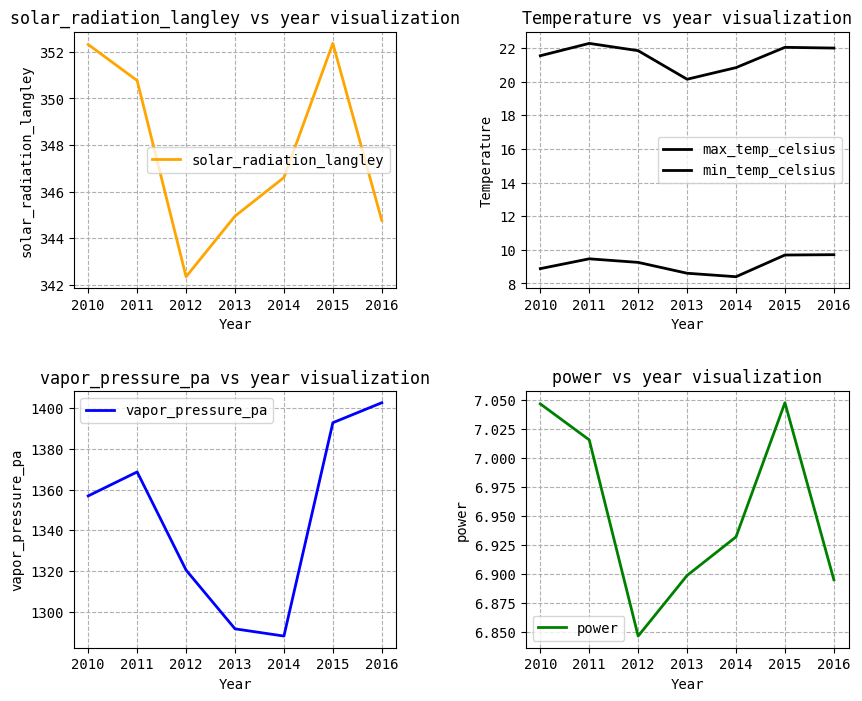

In [ ]:
def plotting(df,height,width,wspace,hspace):

  fig,axes=plt.subplots(2,2,figsize=(width,height))
  plt.subplots_adjust(wspace=wspace,hspace=hspace)
  axes=axes.flatten()
  items=["solar_radiation_langley","max_temp_celsius","vapor_pressure_pa","power"]
  colors=["orange","black","blue","green"]
  double="min_temp_celsius"
  for (index,item),col in zip(enumerate(items),colors):
    if index==1:
      ax=sns.lineplot(data=df,x="year",y=f"{item}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
      ax=sns.lineplot(data=df,x="year",y=f"{double}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{double}")
      ax.grid(True,linestyle="--")
      ax.set_xlabel("Year")
      ax.set_ylabel("Temperature")
      ax.set_title("Temperature vs year visualization")
    else:
      ax=sns.lineplot(data=df,x="year",y=f"{item}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
      ax.grid(True,linestyle="--")
      ax.set_xlabel("Year")
      ax.set_ylabel(f"{item}")
      ax.set_title(f"{item} vs year visualization")

if __name__=="__main__":
  plotting(df,height=8,width=10,wspace=0.4,hspace=0.4)

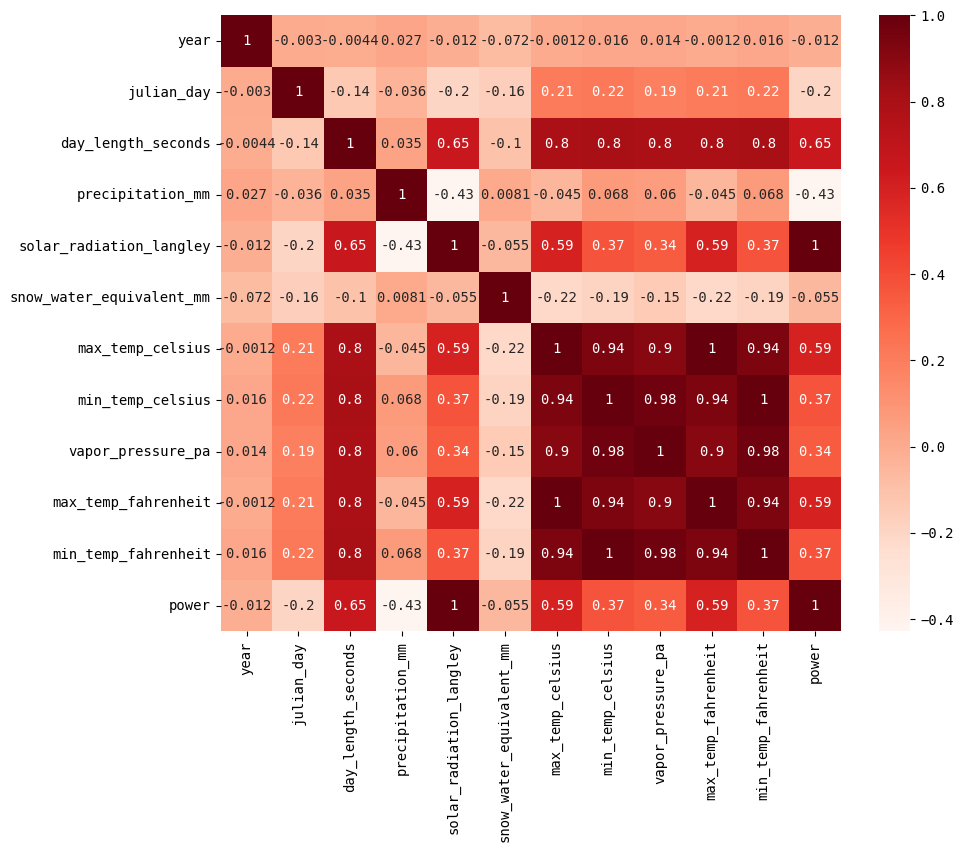

In [ ]:
def pairplot(df):
  plt.figure(figsize=(10,8))
  numerical_columns=df.select_dtypes(include=["number"]).columns.tolist()
  sns.heatmap(df[numerical_columns].corr(),cmap="Reds",annot=True)
  plt.show()

if __name__=="__main__":
  pairplot(df)

# **Our target column is going to be solar radiation so lets focus on this**

<ipython-input-172-966779733>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-172-966779733>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-172-966779733>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-172-966779733>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,l

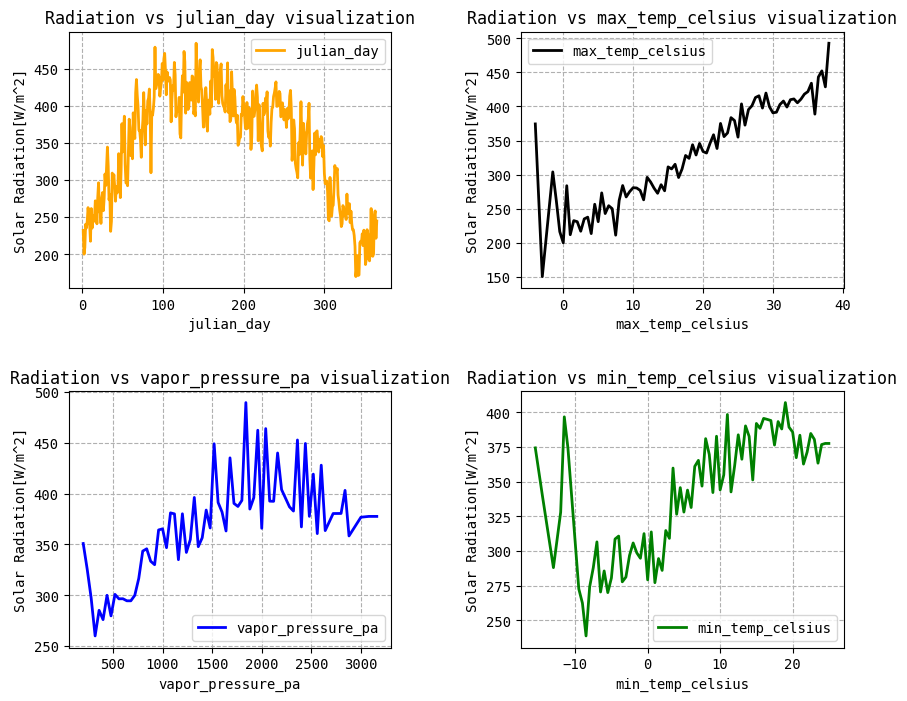

In [ ]:
def plotting_1(df,height,width,wspace,hspace):

  fig,axes=plt.subplots(2,2,figsize=(width,height))
  plt.subplots_adjust(wspace=wspace,hspace=hspace)
  axes=axes.flatten()
  items=["julian_day","max_temp_celsius","vapor_pressure_pa","min_temp_celsius"]
  colors=["orange","black","blue","green"]
  for (index,item),col in zip(enumerate(items),colors):
      ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
      ax.grid(True,linestyle="--")
      ax.set_xlabel(f"{item}")
      ax.set_ylabel("Solar Radiation[W/m^2]")
      ax.set_title(f"Radiation vs {item} visualization")


if __name__=="__main__":
  plotting_1(df,height=8,width=10,wspace=0.4,hspace=0.4)

<ipython-input-173-2500219639>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-173-2500219639>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")


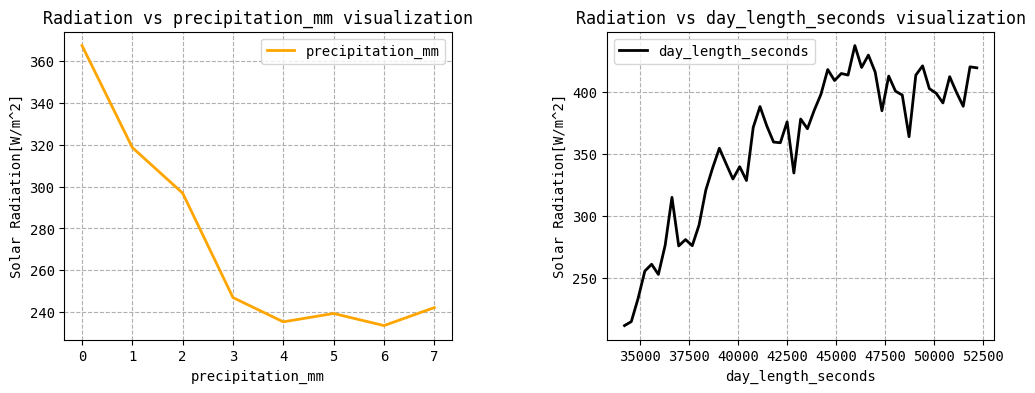

In [ ]:
def plotting_1(df,height,width,wspace,hspace):

  fig,axes=plt.subplots(1,2,figsize=(width,height))
  plt.subplots_adjust(wspace=wspace,hspace=hspace)
  axes=axes.flatten()
  items=["precipitation_mm","day_length_seconds"]
  colors=["orange","black"]
  for (index,item),col in zip(enumerate(items),colors):
      ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
      ax.grid(True,linestyle="--")
      ax.set_xlabel(f"{item}")
      ax.set_ylabel("Solar Radiation[W/m^2]")
      ax.set_title(f"Radiation vs {item} visualization")


if __name__=="__main__":
  plotting_1(df,height=4,width=12,wspace=0.4,hspace=0.4)

# **Training session(Data Preprocessing)**

1.Dont need to encode data as no categorical columns

2.Need to scale data

3.Split data using train test split

4.set the target data


# **Splitting data in between train and test set**

In [ ]:
def splitting_data(target_col,df):

  index=df["year"]
  input_cols=[col for col in df.columns if col not in target_col]
  X=df[input_cols]
  y=df[target_col]
  X_index=X["year"]


  return X,y,X_index

if __name__=="__main__":
  target_col=["solar_radiation_langley","power"]
  X,y,X_index=splitting_data(target_col,df)

# **Sequence creation**

In [ ]:
def sequence_creation(X,y,sequence_length):
  sequences=[]
  labels=[]

  for i in range(len(X)-sequence_length):
    rows=X.iloc[i:i+sequence_length]
    cols=y.iloc[i+sequence_length]

    sequences.append(rows)
    labels.append(cols)

  return np.array(sequences),np.array(labels)

if __name__=="__main__":
  sequence_length=50
  sequences,labels=sequence_creation(X,y,sequence_length)

In [ ]:
def training_test(train_size,sequences,labels):
  X_train,X_test=sequences[:train_size],sequences[train_size:]
  y_train,y_test=labels[:train_size],labels[train_size:]
  print("X_train shape :",X_train.shape)
  print("y_train shape :",y_train.shape)
  print("X_test shape :",X_test.shape)
  print("y_test shape :",y_test.shape)




  return X_train,y_train,X_test,y_test

if __name__=="__main__":
   train_size=int(len(X)*0.8)
   X_train,y_train,X_test,y_test=training_test(train_size,sequences,labels)

X_train shape : (1738, 50, 10)
y_train shape : (1738, 2)
X_test shape : (385, 50, 10)
y_test shape : (385, 2)


# **Scaling data**

In [ ]:
def scaling_data(X_train,X_test,y_train,y_test):
  X_scaler=StandardScaler()
  y_scaler=StandardScaler()

  X_train_shape=X_train.shape
  X_test_shape=X_test.shape


  X_train_reshaped=X_train.reshape(-1,X_train_shape[-1])
  X_test_reshaped=X_test.reshape(-1,X_test_shape[-1])

  X_train_scaled_reshaped=X_scaler.fit_transform(X_train_reshaped)
  X_test_scaled_reshaped=X_scaler.transform(X_test_reshaped)

  y_train_scaled=y_scaler.fit_transform(y_train)
  y_test_scaled=y_scaler.transform(y_test)


  X_train_scaled=X_train_scaled_reshaped.reshape(X_train_shape)
  X_test_scaled=X_test_scaled_reshaped.reshape(X_test_shape)

  return  X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled,X_scaler,y_scaler,X_train_shape,X_test_shape

if __name__=="__main__":
   X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled,X_scaler,y_scaler,X_train_shape,X_test_shape=scaling_data(X_train,X_test,y_train,y_test)


# **Explanation of the whole thing happening inside**

In [ ]:
A=[[[1,2,3,4,5],
   [2,3,4,5,5],[2,3,4,5,9]],                        #3D array
   [[1,2,3,4,5],
   [2,3,4,5,5],[2,3,4,5,5]]]
A=np.array(A)
A_shape=A.shape
X=A.reshape(-1,A.shape[-1])                       #2D array
X.reshape(A_shape)                                 #RESHAPED BACK TO 3D ARRAY

array([[[1, 2, 3, 4, 5],
        [2, 3, 4, 5, 5],
        [2, 3, 4, 5, 9]],

       [[1, 2, 3, 4, 5],
        [2, 3, 4, 5, 5],
        [2, 3, 4, 5, 5]]])

# **Model evaluation**

In [ ]:
def model_defining(X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled,layer_1,layer_2,layer_3,layer_4,dropout,learning_rate,patience,epochs):
  model=Sequential([
      InputLayer(shape=(X_train.shape[1],X_train.shape[2])),
      #LSTM(328,return_sequences=True),
      #Dropout(dropout),
      #LSTM(layer_1,return_sequences=True),
      #Dropout(dropout),
      #LSTM(layer_2,return_sequences=True),
      #Dropout(dropout),
      LSTM(layer_3,return_sequences=True),
      Dropout(dropout),
      LSTM(layer_4,return_sequences=False),
      Dropout(dropout),
      Dense(2)
  ])


  optimizer=Adam(learning_rate=learning_rate)
  earlystopping=EarlyStopping(restore_best_weights=True,patience=patience)
  model.compile(optimizer=optimizer,loss=["mean_squared_error"],metrics=["mse"])



  history=model.fit(X_train_scaled,y_train_scaled,epochs=epochs,callbacks=[earlystopping],validation_data=[X_test_scaled,y_test_scaled])

  return history,model

if __name__=="__main__":
  layer_1=256
  layer_2=128
  layer_3=64
  layer_4=32
  dropout=0.2
  learning_rate=0.005
  patience=10
  epochs=300
  history,model=model_defining(X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled,layer_1,layer_2,layer_3,layer_4,dropout,learning_rate,patience,epochs)



Epoch 1/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.6572 - mse: 0.6572 - val_loss: 0.5232 - val_mse: 0.5232
Epoch 2/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.5113 - mse: 0.5113 - val_loss: 0.5579 - val_mse: 0.5579
Epoch 3/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.5132 - mse: 0.5132 - val_loss: 0.5094 - val_mse: 0.5094
Epoch 4/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.4957 - mse: 0.4957 - val_loss: 0.4551 - val_mse: 0.4551
Epoch 5/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.4910 - mse: 0.4910 - val_loss: 0.4436 - val_mse: 0.4436
Epoch 6/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.4489 - mse: 0.4489 - val_loss: 0.4790 - val_mse: 0.4790
Epoch 7/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.3980 - mse: 0.3980 - val_loss: 0.4014 - val_mse: 0.4014
Epoch 8/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.4181 - mse: 0.4181 - val_loss: 0.3929 - val_mse: 0.3929
Epoch 9/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - lo

# **Predicting**

In [ ]:
def predicted_dataframe(X_test_scaled,y_test_scaled):
  act=pd.DataFrame(y_scaler.inverse_transform(y_test_scaled))
  pred=pd.DataFrame(y_scaler.inverse_transform(model.predict(X_test_scaled)))

  concated_data=pd.concat([act,pred],axis=1)
  concated_data.columns=["act_rad","act_power","pred_rad","pred_power"]
  return concated_data,pred,act




if __name__=="__main__":
  concated_data,pred,act=predicted_dataframe(X_test_scaled,y_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


# **Calculating error matrix**

In [ ]:
def error_metrix_1(act,pred):
  rmse=root_mean_squared_error(act,pred)
  mse=mean_squared_error(act,pred)
  mae=mean_absolute_error(act,pred)
  mape=mean_absolute_percentage_error(act,pred)
  r2=r2_score(act,pred)
  dict_1={
      "rmse":[rmse],
      "mse":[mse],
      "mae":[mae],
      "mape":[mape],
      "r2":[r2]
  }
  error_metrix=pd.DataFrame(dict_1)
  error_metrix.to_csv("lstm_error.csv")
  return error_metrix


if __name__=="__main__":
  error_metrix=error_metrix_1(act,pred)
error_metrix

,rmse,mse,mae,mape,r2
0,29.413456,1663.825052,22.231762,0.165513,0.641537


# **Plotting Predicted data**

<ipython-input-261-94020995>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=concated_data, x=concated_data.index, y=col_name, ax=axes[i], ci=None, linewidth=3, color=plot_colors[i][j], label=col_name)
<ipython-input-261-94020995>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=concated_data, x=concated_data.index, y=col_name, ax=axes[i], ci=None, linewidth=3, color=plot_colors[i][j], label=col_name)
<ipython-input-261-94020995>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=concated_data, x=concated_data.index, y=col_name, ax=axes[i], ci=None, linewidth=3, color=plot_colors[i][j], label=col_name)
<ipython-input-261-94020995>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=concated_data, x=concated_dat

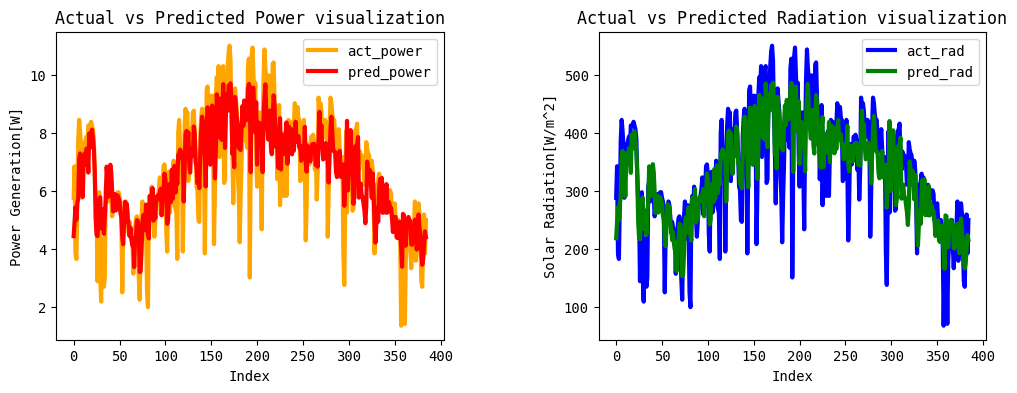

In [ ]:
def plotting_pred(concated_data,height,width,wspace,hspace,X_index):
  fig,axes=plt.subplots(1,2,figsize=(width,height))
  plt.subplots_adjust(wspace=wspace,hspace=hspace)
  axes=axes.flatten()
  items_1=['act_power','pred_power']
  items_2=['act_rad','pred_rad']
  items_of_item=[items_1,items_2]
  plot_colors = [['orange', 'red'], ['blue', 'green']]

  for i, cols_to_plot in enumerate(items_of_item):
      for j, col_name in enumerate(cols_to_plot):
          ax=sns.lineplot(data=concated_data, x=concated_data.index, y=col_name, ax=axes[i], ci=None, linewidth=3, color=plot_colors[i][j], label=col_name)
      if i == 0:
          ax.set_ylabel("Power Generation[W]")
          ax.set_title("Actual vs Predicted Power visualization")
          ax.set_xlabel("Index")
      else:
          ax.set_ylabel("Solar Radiation[W/m^2]")
          ax.set_title("Actual vs Predicted Radiation visualization")
          ax.set_xlabel("Index")
      axes[i].legend()
  plt.savefig("lstm_prediction",dpi=1000)

if __name__=="__main__":
  height=4
  width=12
  wspace=0.4
  hspace=0.4

  plotting_pred(concated_data,height,width,wspace,hspace,X_index)

# **PLOTTING LOSSES**

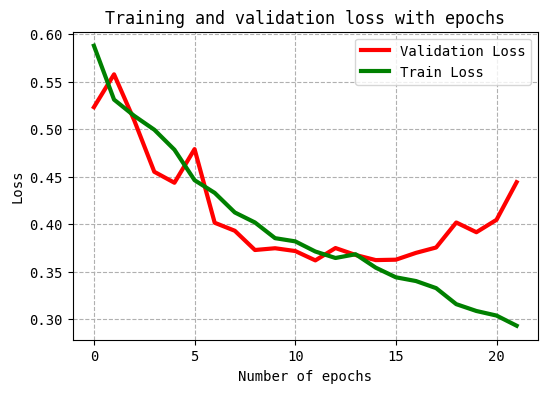

In [ ]:
def loss_plotting(history):
  plt.figure(figsize=(6,4))
  ax=sns.lineplot(history.history["val_loss"],color="red",linewidth=3,label="Validation Loss")
  ax=sns.lineplot(history.history["loss"],color="green",linewidth=3,label="Train Loss")
  ax.grid(True,linestyle="--")
  ax.set_xlabel("Number of epochs")
  ax.set_ylabel("Loss")
  ax.set_title("Training and validation loss with epochs")
  plt.savefig("lstm_loss.jpg",dpi=1000)

if __name__=="__main__":
  loss_plotting(history)

# **Bidirectional model Training**




In [ ]:
def model_defining(X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled,layer_1,layer_2,layer_3,layer_4,dropout,learning_rate,patience,epochs):
  model=Sequential([
      InputLayer(shape=(X_train.shape[1],X_train.shape[2])),
      #LSTM(328,return_sequences=True),
      #Dropout(dropout),
      #LSTM(layer_1,return_sequences=True),
      #Dropout(dropout),
      #LSTM(layer_2,return_sequences=True),
      #Dropout(dropout),
      Bidirectional(LSTM(layer_3,return_sequences=True)),
      Dropout(dropout),
      Bidirectional(LSTM(layer_4,return_sequences=False)),
      Dropout(dropout),
      Dense(2)
  ])


  optimizer=Adam(learning_rate=learning_rate)
  earlystopping=EarlyStopping(restore_best_weights=True,patience=patience)
  model.compile(optimizer=optimizer,loss=["mean_squared_error"],metrics=["mse"])



  history=model.fit(X_train_scaled,y_train_scaled,epochs=epochs,callbacks=[earlystopping],validation_data=[X_test_scaled,y_test_scaled])

  return history,model

if __name__=="__main__":
  layer_1=256
  layer_2=128
  layer_3=64
  layer_4=32
  dropout=0.2
  learning_rate=0.005
  patience=10
  epochs=300
  history,model=model_defining(X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled,layer_1,layer_2,layer_3,layer_4,dropout,learning_rate,patience,epochs)



Epoch 1/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - loss: 0.6076 - mse: 0.6076 - val_loss: 0.4941 - val_mse: 0.4941
Epoch 2/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 0.5271 - mse: 0.5271 - val_loss: 0.4769 - val_mse: 0.4769
Epoch 3/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.4823 - mse: 0.4823 - val_loss: 0.4359 - val_mse: 0.4359
Epoch 4/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.4555 - mse: 0.4555 - val_loss: 0.4207 - val_mse: 0.4207
Epoch 5/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.4572 - mse: 0.4572 - val_loss: 0.4090 - val_mse: 0.4090
Epoch 6/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.3815 - mse: 0.3815 - val_loss: 0.3757 - val_mse: 0.3757
Epoch 7/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 0.3868 - mse: 0.3868 - val_loss: 0.3633 - val_mse: 0.3633
Epoch 8/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - loss: 0.3759 - mse: 0.3759 - val_loss: 0.3871 - val_mse: 0.3871
Epoch 9/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/s

# **Predicting**

In [ ]:
def predicted_dataframe(X_test_scaled,y_test_scaled):
  act=pd.DataFrame(y_scaler.inverse_transform(y_test_scaled))
  pred=pd.DataFrame(y_scaler.inverse_transform(model.predict(X_test_scaled)))

  concated_data=pd.concat([act,pred],axis=1)
  concated_data.columns=["act_rad","act_power","pred_rad","pred_power"]
  return concated_data,pred,act




if __name__=="__main__":
  concated_data,pred,act=predicted_dataframe(X_test_scaled,y_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step


# **Calculating error matrix**

In [ ]:
def error_metrix_1(act,pred):
  rmse=root_mean_squared_error(act,pred)
  mse=mean_squared_error(act,pred)
  mae=mean_absolute_error(act,pred)
  mape=mean_absolute_percentage_error(act,pred)
  r2=r2_score(act,pred)
  dict_1={
      "rmse":[rmse],
      "mse":[mse],
      "mae":[mae],
      "mape":[mape],
      "r2":[r2]
  }
  error_metrix=pd.DataFrame(dict_1)
  error_metrix.to_csv("bidirectional_lstm_error.csv")
  return error_metrix


if __name__=="__main__":
  error_metrix=error_metrix_1(act,pred)
error_metrix

,rmse,mse,mae,mape,r2
0,29.45654,1668.613456,21.67596,0.16369,0.640004


# **PLOTTING LOSSES**

<ipython-input-280-94020995>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=concated_data, x=concated_data.index, y=col_name, ax=axes[i], ci=None, linewidth=3, color=plot_colors[i][j], label=col_name)
<ipython-input-280-94020995>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=concated_data, x=concated_data.index, y=col_name, ax=axes[i], ci=None, linewidth=3, color=plot_colors[i][j], label=col_name)
<ipython-input-280-94020995>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=concated_data, x=concated_data.index, y=col_name, ax=axes[i], ci=None, linewidth=3, color=plot_colors[i][j], label=col_name)
<ipython-input-280-94020995>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=concated_data, x=concated_dat

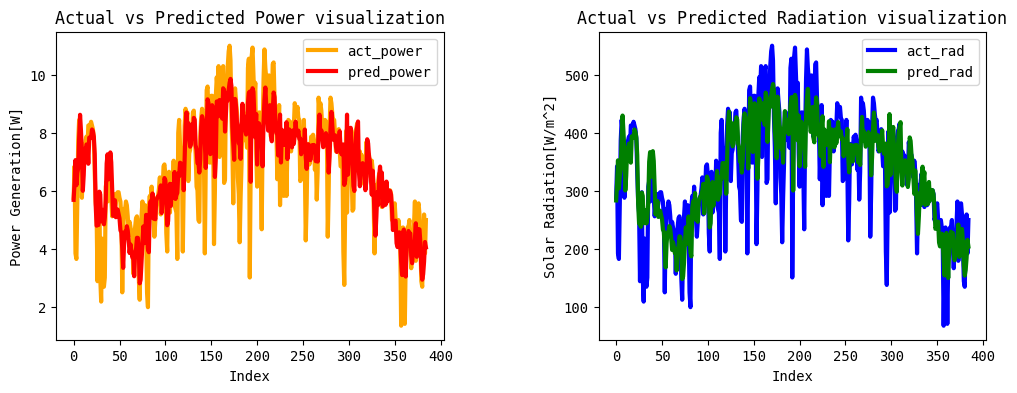

In [ ]:
def plotting_pred(concated_data,height,width,wspace,hspace,X_index):
  fig,axes=plt.subplots(1,2,figsize=(width,height))
  plt.subplots_adjust(wspace=wspace,hspace=hspace)
  axes=axes.flatten()
  items_1=['act_power','pred_power']
  items_2=['act_rad','pred_rad']
  items_of_item=[items_1,items_2]
  plot_colors = [['orange', 'red'], ['blue', 'green']]

  for i, cols_to_plot in enumerate(items_of_item):
      for j, col_name in enumerate(cols_to_plot):
          ax=sns.lineplot(data=concated_data, x=concated_data.index, y=col_name, ax=axes[i], ci=None, linewidth=3, color=plot_colors[i][j], label=col_name)
      if i == 0:
          ax.set_ylabel("Power Generation[W]")
          ax.set_title("Actual vs Predicted Power visualization")
          ax.set_xlabel("Index")
      else:
          ax.set_ylabel("Solar Radiation[W/m^2]")
          ax.set_title("Actual vs Predicted Radiation visualization")
          ax.set_xlabel("Index")
      axes[i].legend()
  plt.savefig("bidirectional_lstm_prediction",dpi=1000)

if __name__=="__main__":
  height=4
  width=12
  wspace=0.4
  hspace=0.4

  plotting_pred(concated_data,height,width,wspace,hspace,X_index)

# **PLOTTING LOSSES**

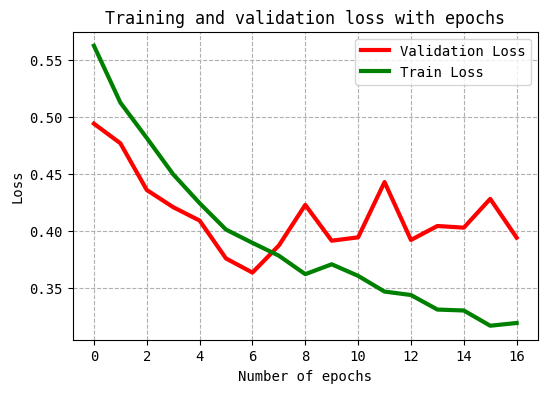

In [ ]:
def loss_plotting(history):
  plt.figure(figsize=(6,4))
  ax=sns.lineplot(history.history["val_loss"],color="red",linewidth=3,label="Validation Loss")
  ax=sns.lineplot(history.history["loss"],color="green",linewidth=3,label="Train Loss")
  ax.grid(True,linestyle="--")
  ax.set_xlabel("Number of epochs")
  ax.set_ylabel("Loss")
  ax.set_title("Training and validation loss with epochs")
  plt.savefig("bidirectional_lstm_loss.jpg",dpi=1000)

if __name__=="__main__":
  loss_plotting(history)